### UNDERSTANDING OF THE PROBLEM STATEMENT:

According to the quote, "Success in sales is the sum of small efforts, repeated day in & day out"

Let us consider a supermarket has several outlets or several stores around the world & they want us to predict the sales which they can expect.

### APPLICATION OF PREDICTING THE SALES:

We can tell the company what are all the challenges they may face

What are the brands or products which is sold the most & other such kind of things

This helps sales team to understand which product to sell & which product to promote & other such kind of things

They can also make several marketing plans(let's say that a particular product in a particular store is getting sold the most & we may find some insights from it - as of why this product is getting sold the most & this helps the company to make better marketing decisions)


### Variable - Description



Item_Identifier - Unique product ID

Item_Weight - Weight of product

Item_Fat_Content - Whether the product is low fat or not

Item_Visibility - The % of total display area of all products in a store allocated to the particular product

Item_Type - The category to which the product belongs

Item_MRP - Maximum Retail Price (list price) of the product

Outlet_Identifier - Unique store ID

Outlet_Establishment_Year - The year in which store was established

Outlet_Size - The size of the store in terms of ground area covered

Outlet_Location_Type - The type of city in which the store is located

Outlet_Type - Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales - Sales of the product in the particular store. This is the outcome variable to be predicted.

### Importing Dependencies

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


import warnings
np.random.seed(0)
warnings.filterwarnings('ignore')

### Data Collection and Analysis

In [135]:
bigmart_data = pd.read_csv('Downloads/archive (2)/Train.csv')

In [136]:
bigmart_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [137]:
bigmart_data.shape

(8523, 12)

In [138]:
bigmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Missing Values

In [139]:
total = bigmart_data.isnull().sum().sort_values(ascending=False)

In [140]:
percent= (bigmart_data.isnull().sum()/bigmart_data.isnull().count()  * 100).sort_values(ascending=False)  # calculating percentage of NAs

In [141]:
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent']) # concatenating total and percent variables

In [142]:
missing_data

,Total,Percent
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317
Item_Outlet_Sales,0,0.000000
Outlet_Type,0,0.000000
Outlet_Location_Type,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Identifier,0,0.000000
Item_MRP,0,0.000000
Item_Type,0,0.000000
Item_Visibility,0,0.000000


In [143]:
bigmart_data.Item_Weight.fillna(bigmart_data.Item_Weight.mean(),inplace=True) #filling the missing values with the mean

In [144]:
bigmart_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Categorical Features

In [145]:
col_list = bigmart_data.select_dtypes(include=['object']).columns.to_list()
col_list

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

### Pivot Table for Outlet size and Outlet Type

### Replacing missing values with the mode in Outlet type

In [146]:
bigmart_data.pivot_table(values='Item_Identifier', columns = 'Item_Fat_Content', aggfunc=(lambda x:x.mode()[0]))

Item_Fat_Content,LF,Low Fat,Regular,low fat,reg
Item_Identifier,FDQ16,DRN47,FDG33,DRH03,FDB26


In [147]:
bigmart_data['Outlet_Size'].fillna(bigmart_data['Outlet_Size'].mode()[0],inplace=True)

In [124]:
# mode_of_outlet_size = bigmart_data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x:x.mode()[0]))

In [125]:
# mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [148]:
missing_values = bigmart_data.Outlet_Size.isnull()

In [149]:
missing_values

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [129]:
# bigmart_data.loc[missing_values,'Outlet_Size'] = bigmart_data.loc[missing_values,'Outlet_Type'].apply(lambda x : mode_of_outlet_size)

In [150]:
bigmart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [151]:
bigmart_data.Item_Weight.value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.560000        2
9.420000        1
5.400000        1
6.520000        1
7.685000        1
Name: Item_Weight, Length: 416, dtype: int64

In [152]:
bigmart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Numerical Features

In [153]:
sns.set()

C:\Users\saurabh.tiwari08\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


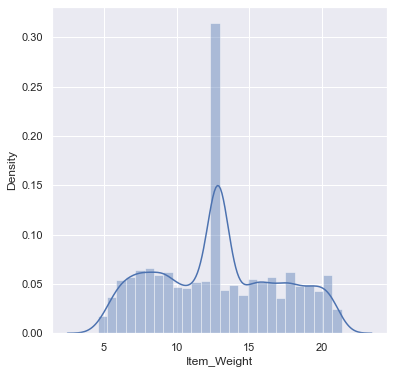

In [154]:
plt.figure(figsize=(6,6))
sns.distplot(bigmart_data['Item_Weight'])
plt.show()

C:\Users\saurabh.tiwari08\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


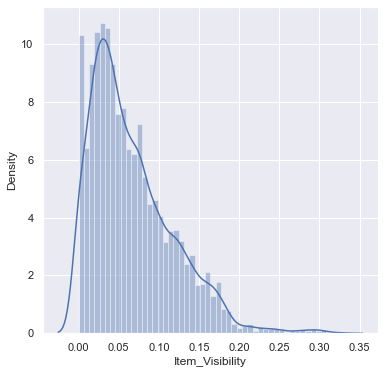

In [155]:
plt.figure(figsize=(6,6))
sns.distplot(bigmart_data['Item_Visibility'])
plt.show()

C:\Users\saurabh.tiwari08\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


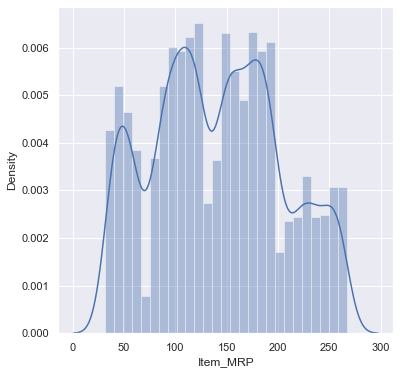

In [156]:
plt.figure(figsize=(6,6))
sns.distplot(bigmart_data['Item_MRP'])
plt.show()

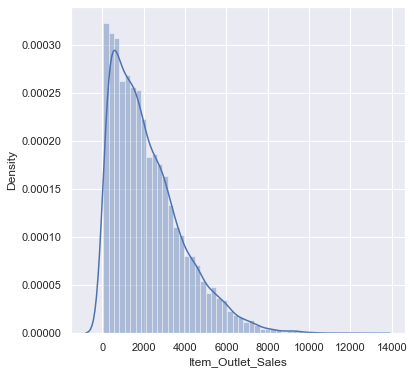

In [216]:
plt.figure(figsize=(6,6))
sns.distplot(bigmart_data['Item_Outlet_Sales'])
plt.show()

Data is skewed towards right means positively skewed.
Show peakness.
Deviate from normal distribution.

In [219]:
# Let's check for skewness and kurtosis
print("Skewness ", bigmart_data['Item_Outlet_Sales'].skew())
print("Kurtosis ", bigmart_data['Item_Outlet_Sales'].kurt())

Skewness  1.1775306028542798
Kurtosis  1.6158766814287264


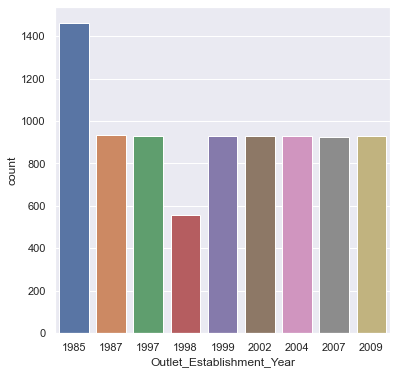

In [218]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=bigmart_data)
plt.show()

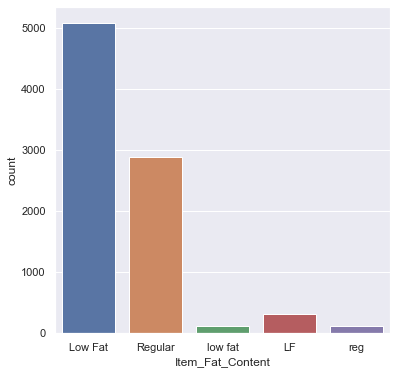

In [159]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=bigmart_data)
plt.show()

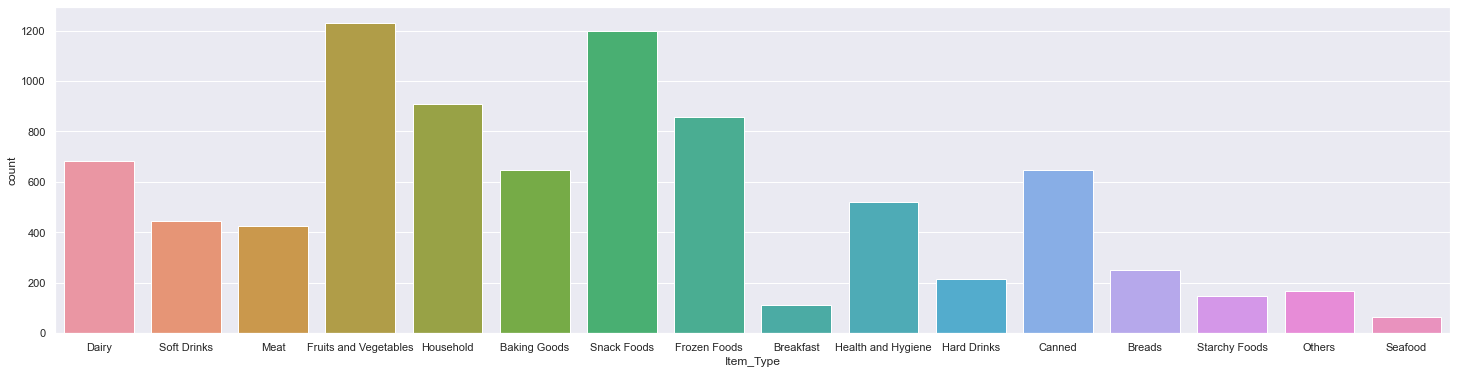

In [160]:
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=bigmart_data)
plt.show()

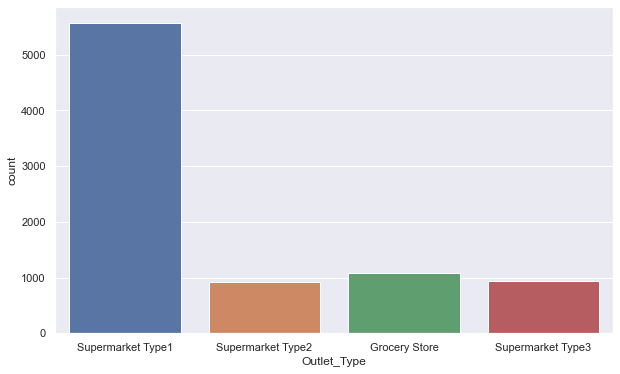

In [161]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type', data=bigmart_data)
plt.show()

In [221]:
import plotly_express as px

sale_visibility = pd.concat([bigmart_data['Item_Outlet_Sales'],bigmart_data['Item_Visibility']],axis=1)
px.scatter(sale_visibility,x='Item_Visibility',y='Item_Outlet_Sales')

NameError: name 'px' is not defined

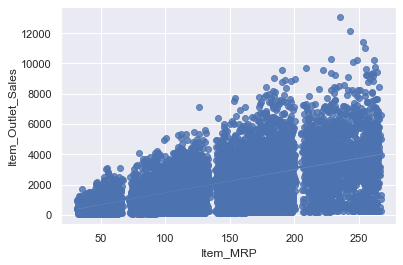

In [229]:
sale_MRP = pd.concat([bigmart_data['Item_Outlet_Sales'],bigmart_data['Item_MRP']],axis=1)
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=sale_MRP)

### DATA PREPROCESSING

In [162]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [163]:
bigmart_data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [164]:
bigmart_data.replace({'Item_Fat_Content':{'low fat': 'Low Fat','LF': 'Low Fat', 'reg' : 'Regular' }}, inplace = True)

In [165]:
bigmart_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### LABEL ENCODING

In [166]:
encoder = LabelEncoder()

In [167]:
bigmart_data['Item_Identifier']=encoder.fit_transform(bigmart_data['Item_Identifier'])

In [168]:
bigmart_data['Item_Fat_Content']=encoder.fit_transform(bigmart_data['Item_Fat_Content'])

In [169]:
bigmart_data['Item_Type']=encoder.fit_transform(bigmart_data['Item_Type'])

In [170]:
bigmart_data['Outlet_Identifier']=encoder.fit_transform(bigmart_data['Outlet_Identifier'])

In [173]:
bigmart_data['Outlet_Size']=encoder.fit_transform(bigmart_data['Outlet_Size'])

In [171]:
bigmart_data['Outlet_Location_Type']=encoder.fit_transform(bigmart_data['Outlet_Location_Type'])

In [172]:
bigmart_data['Outlet_Type']=encoder.fit_transform(bigmart_data['Outlet_Type'])

In [93]:
col_list

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [174]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Checking Correlation 

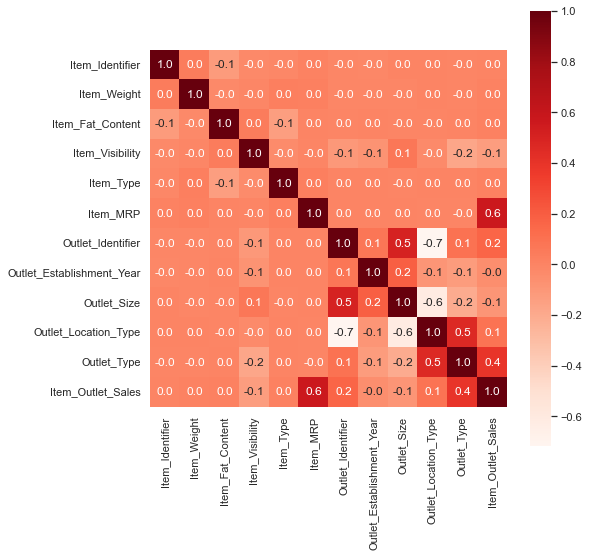

In [201]:
plt.figure(figsize=(8,8))
sns.heatmap(bigmart_data.corr(), cbar = True, square = True, fmt = '0.1f',annot = True, cmap = 'Reds')

### Splitting Features and Target

In [176]:
X = bigmart_data.drop(columns = 'Item_Outlet_Sales', axis = 1)
Y = bigmart_data.Item_Outlet_Sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

### XGBRegressor

In [180]:
regressor = XGBRegressor()

In [181]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

### Linear Regression

In [208]:
from sklearn.linear_model import LinearRegression

In [209]:
LR = LinearRegression()

In [210]:
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluation

In [211]:
training_pred = regressor.predict(X_train)

In [212]:
#R squared Value
r2_train = metrics.r2_score(Y_train,training_pred)
r2_train

0.8549833167058186

In [213]:
testing_pred = regressor.predict(X_test)

In [1]:
# #R squared Value
# r2_train = metrics.r2_score(Y_test,testing_pred)
# r2_train